A1.2 Regresión lineal simple



1. En este bloque de codigo se importo el archivop "FELICIDAD y GDP.csv" usando la funcion de read_cvs() de la libreria de pandas. Luego ordene los datos de 
Felicidad para que esten ordenados de mayor a menor con el comando "sort_values()" y imprimir las primeras 10 filas de lo que viene en los datos de felicidad
usando el comando "head(10)", hice lo mismo pero para los datos de GDP 

In [1]:

#pregunta 1
#importar la libreria en pandas( pandas ayuda en facilitar el analisis y la manipulacion de datos de tablas y de estructuras) 
import pandas as pd 

#cargar el archivo csv a un dataframe el pd.read es una biblioteca de Pandas que se utiliza para leer datos de diferentes archivos y luego los convierte en data frames de pandas. 
df = pd.read_csv('Felicidad y GDP.csv')

df_felicidad = df.sort_values(by='Felicidad', ascending=False)

#aqui va a imprimir las primeras 10 filas de la informacion
print("Paises mas felices: ")
print(df_felicidad[['Pais', 'Felicidad']].head(10))

df_gdp = df.sort_values(by='GDP', ascending=False)

print("Paises con mayor GDP")
                        
print(df_gdp[['Pais', 'GDP']].head(10))


Paises mas felices: 
          Pais  Felicidad
0      Finland     7.8210
1      Denmark     7.6362
2      Iceland     7.5575
3  Switzerland     7.5116
4  Netherlands     7.4149
5   Luxembourg     7.4040
6       Sweden     7.3843
7       Norway     7.3651
8       Israel     7.3638
9  New Zealand     7.1998
Paises con mayor GDP
               Pais           GDP
15    United States  2.089370e+13
70            China  1.468770e+13
52            Japan  5.040110e+12
13          Germany  3.846410e+12
16   United Kingdom  2.756900e+12
130           India  2.667690e+12
19           France  2.630320e+12
29            Italy  1.892570e+12
14           Canada  1.645420e+12
57      South Korea  1.637900e+12


2. En este bloque utilize la libreria numpy para calcular el logaritmo base 10 del GDP. Esto tambien se realizo usnado "np.log10(df['GDP'])" donde lo 
guarde en una variable llamada "Log10_GDP". Luego genere una grafica usando el comando matplotlib, donde puse el eje x como el logarimto de GDP y el
eje y lo puse para mostrar los niveles de felicida. Para hacer los puntos del la grafica estableci un parametro de alpha 0.1 lo cual permite que se 
sea mas facil de ver los puntos en la grafica. 

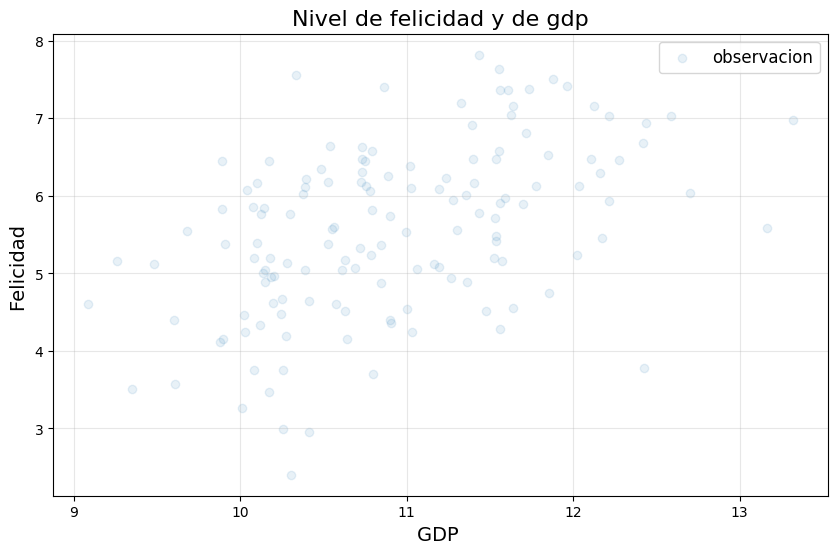

In [3]:

#pregunta 2
import numpy as np
import matplotlib.pyplot as plt

#CALCULAR EL LOG BASE 10 PARA EL GDP
df['Log10_GDP'] = np.log10(df['GDP'])

plt.figure(figsize=(10,6))
plt.scatter(
    df['Log10_GDP'],
    df['Felicidad'],
    alpha=0.1,
    label='observacion'
)

plt.title('Nivel de felicidad y de gdp', fontsize=16)
plt.xlabel('GDP ', fontsize=14)
plt.ylabel('Felicidad ', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

3. En este bloque se calculan los coeficientes del modelo de regresion lineal simple para las variables log10gdp y felicidad. Se definieron como los variables x e y, estas dos variables se organizan como arrays de numpy por lo cual me permitio realizar la operacion matemaica facilmente. Luego calcule las medias de x e y usando np.mean(). Estas medidas son necesarias para que yo pueda
calcular B1 y B0 de la regresion lineal. 

In [21]:
#pregunta 3

import numpy as np
import pandas as pd 

df = pd.read_csv('Felicidad y GDP.csv')

df['Log10_GDP'] = np.log10(df['GDP'])

x = df['Log10_GDP'] #variable independiente para log10
y = df['Felicidad'] #variable dependiente de felicidad

mean_x = np.mean(x)
mean_y = np.mean(y)

numerador = np.sum((x-mean_x)*(y-mean_y))
denominador = np.sum((x-mean_x)**2) 

b1 = numerador / denominador 
b0 = mean_y - b1 * mean_x

print("b1 = ", b1)
print("b0 = ", b0)

b1 =  0.628128465881041
b0 =  -1.3023500570747295


4 y 5. En este bloque de codigo se calculo el y_pred que represeenta los valores predichos de felicidad utilizando el modelo de regresion lineal simple. Calculando el y_pred 
pude calcular el RSS (Residual sum of squares) que es una medida de error cuadrado entre los valores reales de felicidad y y_pred, el codigo calcula usando la formula 

RSS = la sumatoria de(y - y_pred) ^2

Lo cual toma la diferencia al cuadrado entre cada valor de felicidad real y y_pred. 

Luego, en la parte grafica, grafique un diagrama donde muestra los valores del log10GDP(x) y los valores de la felicidad (y). Esto se aplico con una transparencia de 0.75 para
que la grafica sea mas facil de ver. Se agrego una linea de regresion usando el comando "plt.plot()". Esta linea se genera con los valores y_pred. 

RSS = 131.3738317732635


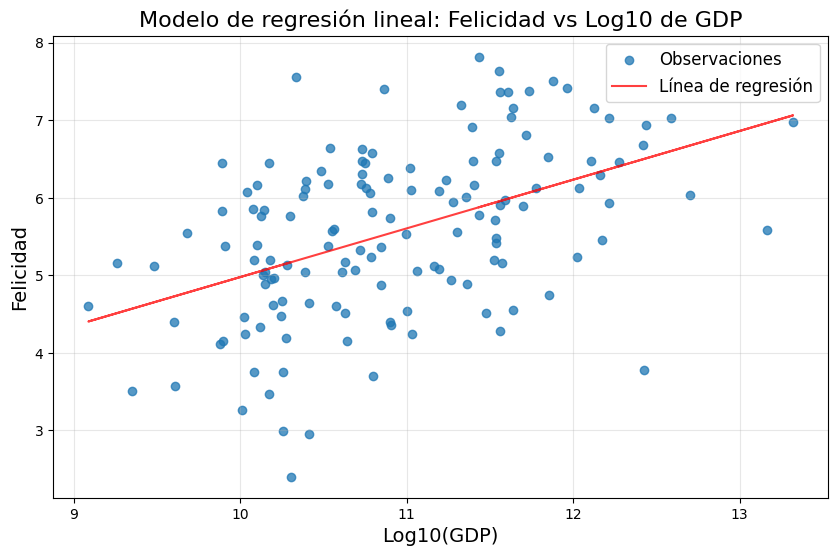

In [5]:

# pregunta 4 y 5 
import matplotlib.pyplot as plt
y_pred = b0 + b1 * x

RSS = np.sum((y - y_pred)**2)
print("RSS =", RSS)

plt.figure(figsize=(10, 6))
plt.scatter(
    x,
    y,
    alpha=0.75,
    label='Observaciones'
)
# Línea de regresión
plt.plot(
    x,
    y_pred,
    color="red",
    alpha=0.75,
    label="Línea de regresión"
)

plt.title('Modelo de regresión lineal: Felicidad vs Log10 de GDP', fontsize=16)
plt.xlabel('Log10(GDP)', fontsize=14)
plt.ylabel('Felicidad', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

6. Este bloque de codigo utilize el comando scipy.stats para obtener el valor ciritico de t, lo que es necesario para calcular el intervalo de confianza de la pendiente B1 de la
regresion, y tambien para realizar la prueba t y tambien utilize el comando "ppf" (percent point function) lo cual calcula el valor critico t para un intervalo de confianza. (La razon de porque puse otra vez el codigo de la pregunta 3,4 y 5 es porque me estaba saliendo un error que no identificaba que es RSS, bo y b1, una disculpa profe pero no se como podia arreglarlo sin tener que poner todo otra vez)

In [18]:
import numpy as np
from scipy.stats import t

x = df['Log10_GDP'] #variable independiente para log10
y = df['Felicidad'] #variable dependiente de felicidad


mean_x = np.mean(x)
mean_y = np.mean(y)

numerador = np.sum((x-mean_x)*(y-mean_y))
denominador = np.sum((x-mean_x)**2) 

b1 = numerador / denominador 
b0 = mean_y - b1 * mean_x

y_pred = b0 + b1 * x

RSS = np.sum((y - y_pred)**2)

#INICIO DE PREGUNTA 6
n = len(x)
SE_B1 = np.sqrt(RSS/((n-2)*denominador))
print ("SE de B1 = ", SE_B1)

#Intervalo de confianza para b1

alpha = 0.05
t_crit = t.ppf(1-alpha/2,df=n - 2) # esto va a dar el valor critico de t para un nivel de confianza del 95%
IC_low = b1 - t_crit * SE_B1
IC_high = b1 + t_crit * SE_B1

print(f"IC de B1: ({IC_low}, {IC_high})")

if IC_low > 0 or IC_high < 0:
    print("La asociacion entre la felicidad y el logaritmo del GDP es significativa.")
else:
    print("La asociacion entre la felicidad y el logaritmo del GDP NO es significativa.")

# USANDO ESTADISTICO T
t_stat = b1/(SE_B1)

print("Prueba de hipotesis usando ESTADISTICO T : ", t_stat)
print("Valor critico de t = ", t_crit)

if abs(t_stat) > t_crit:
    print("La asociacion entre la felicidad y el logaritmo del GDP es significativa.")
    print("Evidencia: ", t_stat, ">", t_crit)
else:
    print("La asociacion entre la felicidad y el logaritmo del GDP NO es significativa.")
    print("Evidencia: ", t_stat, "<", t_crit)

SE de B1 =  0.09983378435340727
IC de B1: (0.43073933130733133, 0.8255176004547506)
La asociacion entre la felicidad y el logaritmo del GDP es significativa.
Prueba de hipotesis usando ESTADISTICO T :  6.291742519320849
Valor critico de t =  1.977177724476122
La asociacion entre la felicidad y el logaritmo del GDP es significativa.
Evidencia:  6.291742519320849 > 1.977177724476122


7. En este bloque de codigo, calcule la Residual Standard Error (RSE), y la coeficiente de determinacion R^2 para evaluar la precision del modelo de regresion lineal entre la felicidad y el Log10GDP. Lo primero que hice fue calcular la RSE usando la formula sqrt(1/n-2 * RSS), luego ya que tengo la respuesta de l RSE calculo el Total Sum of Squares (TSS) y tambien el Explained Sum of Squares (ESS), ya que tengo el TSS y ESS podre calcular el coeficiente de determinacion.

Los comandos que use fueron np.sqrt() para calcular la raiz cuadrada y np.sum() para calcular la suma de los cuadrados. 


In [16]:

#PREGUNTA 7
from scipy.stats import t
#PRIMERO EL RESIDUAL STANDARD ERROR (RSE)
n = len(y)

RSE = np.sqrt((1/(n-2))*RSS)
print ("RSE = ", RSE) 


RSE =  0.9721807858537376


In [13]:
#PARA CALCULAR R^2 NECESITAMOS TSS,RSS LO CUAL YA TENEMOS Y ESS 
y_pred = b0 + b1 * x
TSS = np.sum((y-mean_y)**2)
print("TSS = ", TSS)
ESS = np.sum((y_pred - mean_y)**2)
print("ESS = ", ESS)

R_2 = ESS/TSS

print("R^2 = ", R_2)

TSS =  168.78798751626567
ESS =  37.41415574300217
R^2 =  0.22166361654970654


8. En este codigo, use el comando statsmodel para ajustar el modelo de regresion lineal con OLS(). Lo primero que hice es agregar la constante con sm.add_constatn(x) con log10_GDP lo cual es necesario para estimar correctamente la interseccion del modelo y luego ajuste el modelo con sm.OLS(Y,X).fit() lo que produujo el modelo ajustado. Despues imprimi un resumen con el metodo model.summary() que incluye estadisticas como p-value mas precios con model.pvalues y el calculo de RSE con model.scale. Este codigo se utilizo para confirmar los resultados obtenidos en el analisis que consiste con el modelo estadistico. 

In [14]:

#PREGUNTA 8

import statsmodels.api as sm

X = df['Log10_GDP']
Y = df['Felicidad']

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

print(model.summary())

print("P-values mas preciso: ", model.pvalues)

print("Error estantar residual (RSE): ", model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        22:55:28   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2